Проверяю тип данных в Gross National Income:
Gross National Income
<class 'str'>    193
Name: count, dtype: int64


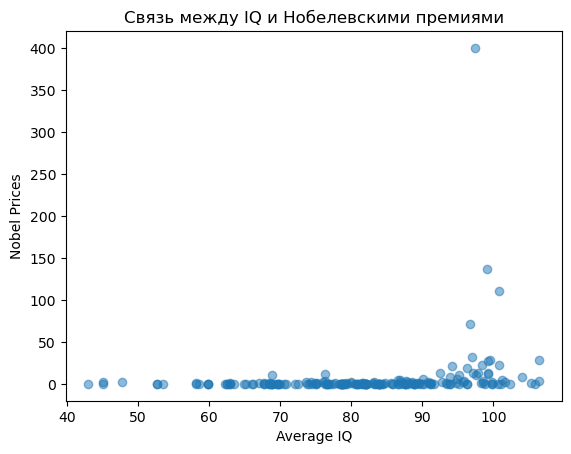

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "IQ_countries.csv"

# reading file as normal text for correct research rows
with open(file_path, 'r', encoding='utf-8') as file:
    lines = file.readlines()

# table's header
headers = lines[0].strip().split(',')

# fnc for format row


def process_row(row):
    values = row.strip().split(',')  # split lines on commas
    values = [v.strip('"') for v in values]  # remove quotes at the beginning and at the end

    # if row is crashed, then return list of 10 elements include empty rows
    while len(values) < len(headers):
        values.append('0')

    return values


# reading all rows and check their
cleaned_data = [process_row(line) for line in lines[1:]]

# created DataFrame from format rows
df = pd.DataFrame(cleaned_data, columns=headers)

# replace empty rows and crashed data on "0"
df.replace([' ', ''], '0', inplace=True)

# I format the data columns into the appropriate data type
df['Rank'] = df['Rank'].astype(int)

#  Заметил что столбец "Population" не валидный. Нужно убрать разделители и буквы
df['Population'] = df['Population'].astype(str)  # Приводим к строке на всякий случай
df['Population'] = df['Population'].str.replace(r'\D', '', regex=True)  # удаляем все кроме цифр
df['Population'] = df['Population'].astype(int)  # приводим к int

print('Проверяю тип данных в Gross National Income:')
print(df['Gross National Income'].apply(type).value_counts())
df['Gross National Income'] = pd.to_numeric(df['Gross National Income'], errors='coerce')
df['Gross National Income'] = df['Gross National Income'].astype('Int64')

# save result
df.to_csv("IQ_countries_clean.csv", index=False)

# load data
data = pd.read_csv("IQ_countries_clean.csv")

# Данные корректны, начинаю построение графиков
# 1. Связь между нобелевскими премиями и интеллектом
plt.scatter(data['Average IQ'], data['Nobel Prices'], alpha=0.5)
plt.xlabel('Average IQ')
plt.ylabel('Nobel Prices')
plt.title('Связь между IQ и Нобелевскими премиями')
plt.show()

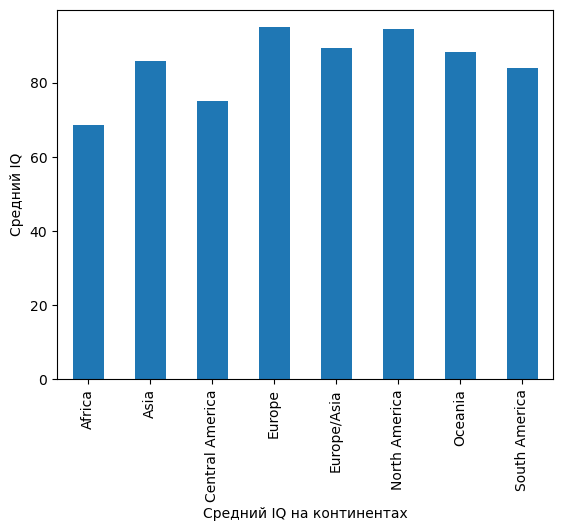

In [8]:
# 2. Средний IQ по Континентам
data.groupby('Continent')['Average IQ'].mean().plot(kind='bar')
plt.ylabel('Средний IQ')
plt.xlabel('Средний IQ на континентах')
plt.show()

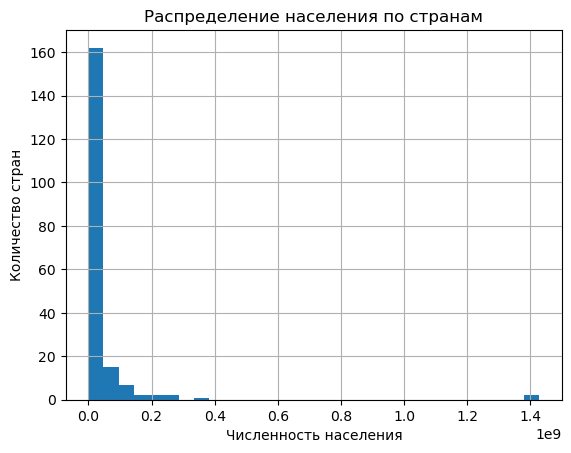

In [10]:
# 3. Распределение численности населения
data['Population'].hist(bins=30)
plt.xlabel('Численность населения')
plt.ylabel('Количество стран')
plt.title('Распределение населения по странам')
plt.show()